In [350]:
import pandas as pd
from pmlb import regression_dataset_names
from pmlb import fetch_data

In [351]:
k = pd.read_pickle(r'results_regression_depth3.pkl')

In [352]:
k = pd.DataFrame(k,index=[0])
k = k.stack(level=2).sort_index()
k = k.stack(level=2).sort_index()
k = k.swaplevel(axis=1)
k = k.droplevel(0)

In [353]:
grid_search_results = k
# depth_3_results = pd.read_csv("results_level3.csv")
# depth_4_results = pd.read_csv("results_level4.csv")

In [354]:
grid_search_results = grid_search_results.reset_index()

In [355]:
grid_search_results = grid_search_results[grid_search_results['level_1'] == 'all']

In [356]:
grid_search_results

,level_0,level_1,CART,LR,LS,OCT,OCT-H,ORT,ORT+ORT-H_LR_rules,ORT+ORT-H_LR_rules_and_features,...,ORT_RG_rules,ORT_RG_rules_and_features,RG,Reg-CART,Reg-CART_LR_rules,Reg-CART_LR_rules_and_features,Reg-CART_LS_rules,Reg-CART_LS_rules_and_features,Reg-CART_RG_rules,Reg-CART_RG_rules_and_features
,,,1027_ESL,1027_ESL,1027_ESL,1027_ESL,1027_ESL,1027_ESL,1027_ESL,1027_ESL,...,banana,banana,banana,banana,banana,banana,banana,banana,banana,banana
9,0,all,NaN,0.866373,0.875515,NaN,NaN,0.613377,0.613377,0.866832,...,0.523907,0.530389,0.000011,0.382131,0.382131,0.408194,0.355654,0.370053,0.382178,0.408243
19,1,all,NaN,0.845986,0.847061,NaN,NaN,0.633235,0.633235,0.840333,...,0.506378,0.511774,0.005099,0.380979,0.380979,0.405086,0.358507,0.363935,0.381050,0.404976
29,2,all,NaN,0.805495,0.804714,NaN,NaN,0.610291,0.610291,0.793593,...,0.525364,0.528922,0.011818,0.388690,0.388690,0.398591,0.358970,0.365147,0.388720,0.398491
39,3,all,NaN,0.835659,0.834215,NaN,NaN,0.435488,0.435488,0.855675,...,0.522366,0.531423,0.003456,0.404823,0.404823,0.433254,0.375099,0.381433,0.404913,0.433277
49,4,all,NaN,0.761666,0.759507,NaN,NaN,0.375937,0.375937,0.753198,...,0.485428,0.503682,0.006816,0.389105,0.389105,0.402967,0.360032,0.362943,0.389200,0.403076


In [357]:
for column in grid_search_results.columns:

    try:
        grid_search_results[column] = grid_search_results[column].astype(float)
    except: 
        del grid_search_results[column]

In [358]:
grid_search_results

,level_0,CART,LR,LS,OCT,OCT-H,ORT,ORT+ORT-H_LR_rules,ORT+ORT-H_LR_rules_and_features,ORT+ORT-H_LS_rules,...,ORT_RG_rules,ORT_RG_rules_and_features,RG,Reg-CART,Reg-CART_LR_rules,Reg-CART_LR_rules_and_features,Reg-CART_LS_rules,Reg-CART_LS_rules_and_features,Reg-CART_RG_rules,Reg-CART_RG_rules_and_features
,,1027_ESL,1027_ESL,1027_ESL,1027_ESL,1027_ESL,1027_ESL,1027_ESL,1027_ESL,1027_ESL,...,banana,banana,banana,banana,banana,banana,banana,banana,banana,banana
9,0.0,NaN,0.866373,0.875515,NaN,NaN,0.613377,0.613377,0.866832,0.607048,...,0.523907,0.530389,0.000011,0.382131,0.382131,0.408194,0.355654,0.370053,0.382178,0.408243
19,1.0,NaN,0.845986,0.847061,NaN,NaN,0.633235,0.633235,0.840333,0.619294,...,0.506378,0.511774,0.005099,0.380979,0.380979,0.405086,0.358507,0.363935,0.381050,0.404976
29,2.0,NaN,0.805495,0.804714,NaN,NaN,0.610291,0.610291,0.793593,0.591806,...,0.525364,0.528922,0.011818,0.388690,0.388690,0.398591,0.358970,0.365147,0.388720,0.398491
39,3.0,NaN,0.835659,0.834215,NaN,NaN,0.435488,0.435488,0.855675,0.466324,...,0.522366,0.531423,0.003456,0.404823,0.404823,0.433254,0.375099,0.381433,0.404913,0.433277
49,4.0,NaN,0.761666,0.759507,NaN,NaN,0.375937,0.375937,0.753198,0.387106,...,0.485428,0.503682,0.006816,0.389105,0.389105,0.402967,0.360032,0.362943,0.389200,0.403076


In [359]:
datasets = grid_search_results.iloc[:, 1:].mean(level = 1, axis = 1).mean(axis = 0).sort_values()

/var/folders/q6/czkds0m930qfg8g6_k7km9cm0000gp/T/ipykernel_45014/3877467421.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  datasets = grid_search_results.iloc[:, 1:].mean(level = 1, axis = 1).mean(axis = 0).sort_values()


In [360]:
grid_search_results = grid_search_results[[i for i in grid_search_results.columns if i[1] in datasets]]

In [361]:
all_values = grid_search_results.stack(level = 1)

In [362]:
all_values = all_values.droplevel(0)

In [363]:
all_values = all_values.sort_index().iloc[5:]

In [364]:
means = all_values

In [365]:
means.fillna(means.mean(), inplace = True)

In [366]:
# means.dropna(how = 'any', axis = 1, inplace = True)

In [367]:
means

,CART,LR,LS,OCT,OCT-H,ORT,ORT+ORT-H_LR_rules,ORT+ORT-H_LR_rules_and_features,ORT+ORT-H_LS_rules,ORT+ORT-H_LS_rules_and_features,...,ORT_RG_rules,ORT_RG_rules_and_features,RG,Reg-CART,Reg-CART_LR_rules,Reg-CART_LR_rules_and_features,Reg-CART_LS_rules,Reg-CART_LS_rules_and_features,Reg-CART_RG_rules,Reg-CART_RG_rules_and_features
1028_SWD,NaN,0.424777,0.426796,NaN,NaN,0.277625,0.277625,0.413857,0.280418,0.427009,...,0.279292,0.414896,0.424845,0.371680,0.371680,0.433549,0.372653,0.445148,0.372101,0.438575
1028_SWD,NaN,0.444566,0.443435,NaN,NaN,0.387839,0.387839,0.451811,0.375686,0.447780,...,0.393646,0.456044,0.444567,0.387839,0.387839,0.451811,0.375686,0.447780,0.393646,0.456044
1028_SWD,NaN,0.337128,0.335080,NaN,NaN,0.296994,0.296994,0.331214,0.293277,0.330615,...,0.296899,0.331566,0.337140,0.281749,0.281749,0.327110,0.283064,0.330615,0.282567,0.327922
1028_SWD,NaN,0.340263,0.361225,NaN,NaN,0.255466,0.255466,0.335989,0.294168,0.362026,...,0.262812,0.339245,0.340501,0.255466,0.255466,0.335989,0.294168,0.362026,0.262812,0.339245
1028_SWD,NaN,0.411808,0.412665,NaN,NaN,0.349062,0.349062,0.419544,0.335379,0.417333,...,0.351201,0.421476,0.411844,0.349062,0.349062,0.419544,0.335379,0.417333,0.351201,0.421476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
banana,NaN,0.011819,0.009035,NaN,NaN,0.525299,0.525299,0.528751,0.486254,0.488228,...,0.525364,0.528922,0.011818,0.388690,0.388690,0.398591,0.358970,0.365147,0.388720,0.398491
banana,NaN,0.005099,0.004343,NaN,NaN,0.506273,0.506273,0.511738,0.486516,0.489493,...,0.506378,0.511774,0.005099,0.380979,0.380979,0.405086,0.358507,0.363935,0.381050,0.404976
banana,NaN,0.000009,0.001184,NaN,NaN,0.523882,0.523836,0.530275,0.482825,0.484343,...,0.523907,0.530389,0.000011,0.382131,0.382131,0.408194,0.355654,0.370053,0.382178,0.408243
banana,NaN,0.003455,0.003678,NaN,NaN,0.522342,0.522342,0.531435,0.466628,0.466184,...,0.522366,0.531423,0.003456,0.404823,0.404823,0.433254,0.375099,0.381433,0.404913,0.433277


In [368]:
means

,CART,LR,LS,OCT,OCT-H,ORT,ORT+ORT-H_LR_rules,ORT+ORT-H_LR_rules_and_features,ORT+ORT-H_LS_rules,ORT+ORT-H_LS_rules_and_features,...,ORT_RG_rules,ORT_RG_rules_and_features,RG,Reg-CART,Reg-CART_LR_rules,Reg-CART_LR_rules_and_features,Reg-CART_LS_rules,Reg-CART_LS_rules_and_features,Reg-CART_RG_rules,Reg-CART_RG_rules_and_features
1028_SWD,NaN,0.424777,0.426796,NaN,NaN,0.277625,0.277625,0.413857,0.280418,0.427009,...,0.279292,0.414896,0.424845,0.371680,0.371680,0.433549,0.372653,0.445148,0.372101,0.438575
1028_SWD,NaN,0.444566,0.443435,NaN,NaN,0.387839,0.387839,0.451811,0.375686,0.447780,...,0.393646,0.456044,0.444567,0.387839,0.387839,0.451811,0.375686,0.447780,0.393646,0.456044
1028_SWD,NaN,0.337128,0.335080,NaN,NaN,0.296994,0.296994,0.331214,0.293277,0.330615,...,0.296899,0.331566,0.337140,0.281749,0.281749,0.327110,0.283064,0.330615,0.282567,0.327922
1028_SWD,NaN,0.340263,0.361225,NaN,NaN,0.255466,0.255466,0.335989,0.294168,0.362026,...,0.262812,0.339245,0.340501,0.255466,0.255466,0.335989,0.294168,0.362026,0.262812,0.339245
1028_SWD,NaN,0.411808,0.412665,NaN,NaN,0.349062,0.349062,0.419544,0.335379,0.417333,...,0.351201,0.421476,0.411844,0.349062,0.349062,0.419544,0.335379,0.417333,0.351201,0.421476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
banana,NaN,0.011819,0.009035,NaN,NaN,0.525299,0.525299,0.528751,0.486254,0.488228,...,0.525364,0.528922,0.011818,0.388690,0.388690,0.398591,0.358970,0.365147,0.388720,0.398491
banana,NaN,0.005099,0.004343,NaN,NaN,0.506273,0.506273,0.511738,0.486516,0.489493,...,0.506378,0.511774,0.005099,0.380979,0.380979,0.405086,0.358507,0.363935,0.381050,0.404976
banana,NaN,0.000009,0.001184,NaN,NaN,0.523882,0.523836,0.530275,0.482825,0.484343,...,0.523907,0.530389,0.000011,0.382131,0.382131,0.408194,0.355654,0.370053,0.382178,0.408243
banana,NaN,0.003455,0.003678,NaN,NaN,0.522342,0.522342,0.531435,0.466628,0.466184,...,0.522366,0.531423,0.003456,0.404823,0.404823,0.433254,0.375099,0.381433,0.404913,0.433277


In [369]:
sorted_cols = means.mean().sort_values(ascending = True).index

In [370]:
means = means[sorted_cols]

In [371]:
means

,LR,RG,LS,Reg-CART_LR_rules,Reg-CART,Reg-CART_LS_rules,Reg-CART_RG_rules,ORT,ORT+ORT-H_LR_rules,ORT_LR_rules,...,ORT+ORT-H_LR_rules_and_features,ORT_LR_rules_and_features,ORT_LS_rules_and_features,ORT+ORT-H_LS_rules_and_features,ORT+ORT-H_RG_rules_and_features,ORT_RG_rules_and_features,CART,OCT,OCT-H,ORT-H
1028_SWD,0.424777,0.424845,0.426796,0.371680,0.371680,0.372653,0.372101,0.277625,0.277625,0.277625,...,0.413857,0.413857,0.427009,0.427009,0.414896,0.414896,NaN,NaN,NaN,NaN
1028_SWD,0.444566,0.444567,0.443435,0.387839,0.387839,0.375686,0.393646,0.387839,0.387839,0.387839,...,0.451811,0.451811,0.447780,0.447780,0.456044,0.456044,NaN,NaN,NaN,NaN
1028_SWD,0.337128,0.337140,0.335080,0.281749,0.281749,0.283064,0.282567,0.296994,0.296994,0.296994,...,0.331214,0.331214,0.330615,0.330615,0.331566,0.331566,NaN,NaN,NaN,NaN
1028_SWD,0.340263,0.340501,0.361225,0.255466,0.255466,0.294168,0.262812,0.255466,0.255466,0.255466,...,0.335989,0.335989,0.362026,0.362026,0.339245,0.339245,NaN,NaN,NaN,NaN
1028_SWD,0.411808,0.411844,0.412665,0.349062,0.349062,0.335379,0.351201,0.349062,0.349062,0.349062,...,0.419544,0.419544,0.417333,0.417333,0.421476,0.421476,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
banana,0.011819,0.011818,0.009035,0.388690,0.388690,0.358970,0.388720,0.525299,0.525299,0.525299,...,0.528751,0.528751,0.488228,0.488228,0.528922,0.528922,NaN,NaN,NaN,NaN
banana,0.005099,0.005099,0.004343,0.380979,0.380979,0.358507,0.381050,0.506273,0.506273,0.506273,...,0.511738,0.511738,0.489493,0.489493,0.511774,0.511774,NaN,NaN,NaN,NaN
banana,0.000009,0.000011,0.001184,0.382131,0.382131,0.355654,0.382178,0.523882,0.523836,0.523836,...,0.530275,0.530275,0.484343,0.484343,0.530389,0.530389,NaN,NaN,NaN,NaN
banana,0.003455,0.003456,0.003678,0.404823,0.404823,0.375099,0.404913,0.522342,0.522342,0.522342,...,0.531435,0.531435,0.466184,0.466184,0.531423,0.531423,NaN,NaN,NaN,NaN


In [373]:
means = means[['LR', "Reg-CART", 'ORT', 'Reg-CART_LR_rules_and_features', 'ORT_LR_rules_and_features']]

(-0.5, 1.05)

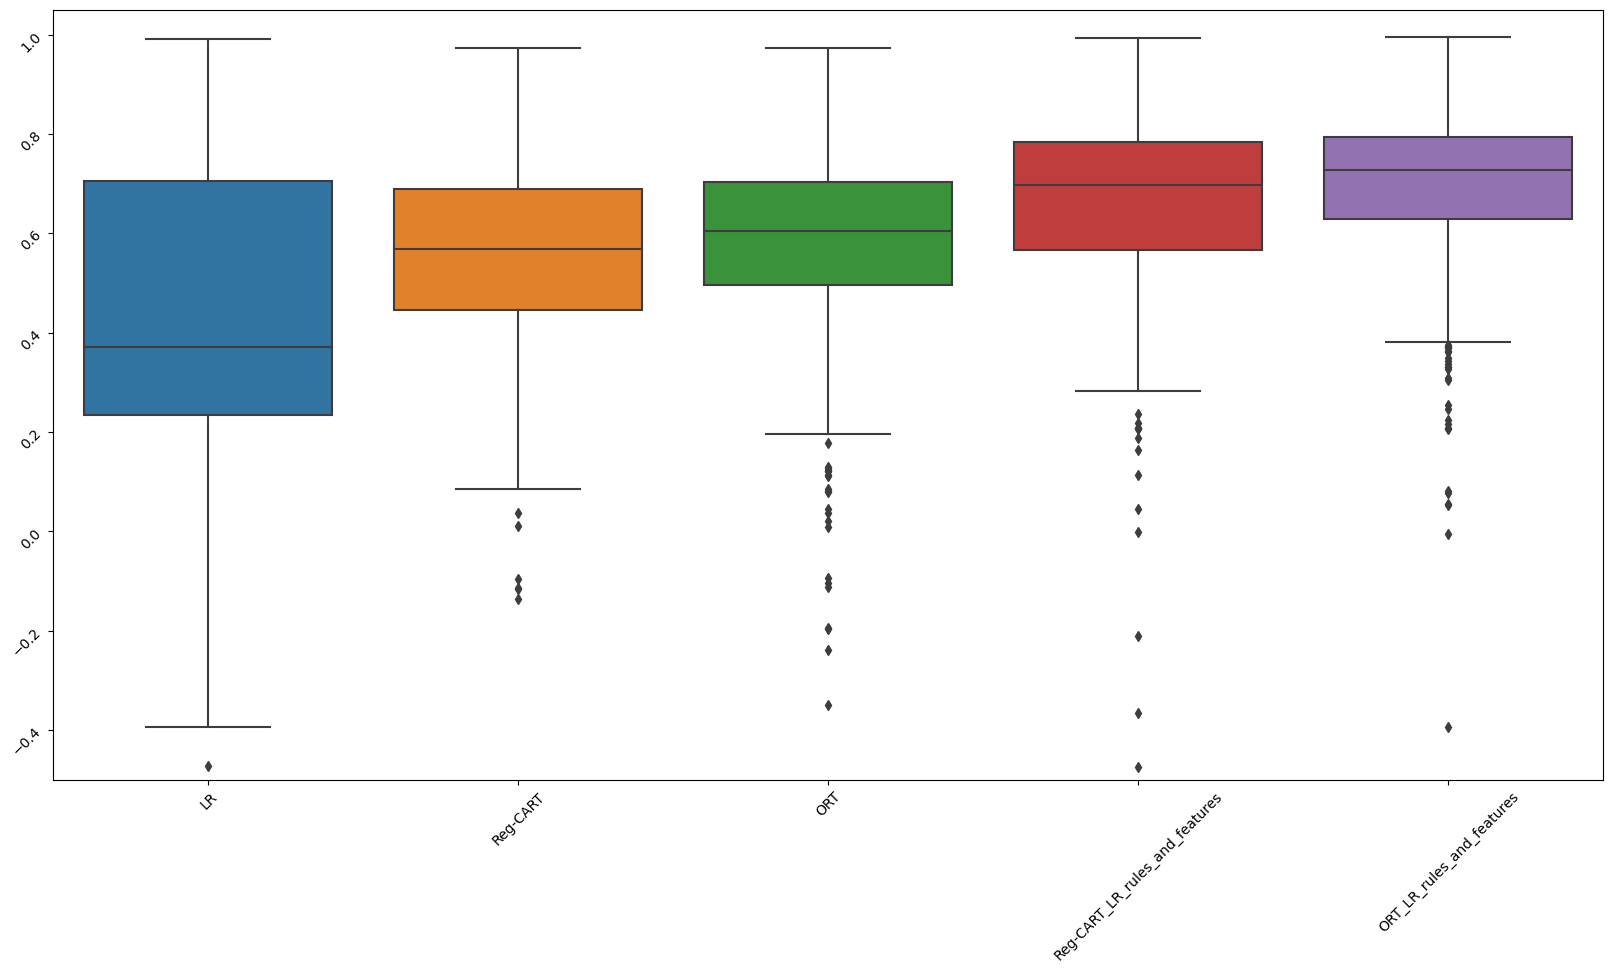

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax= plt.subplots()

fig.set_size_inches(20, 10)

sns.boxplot(data = means)
ax.tick_params(rotation = 45)

ax.set_ylim([-0.5, 1.05])

In [375]:
import scipy.stats as stats
stats.ttest_ind(a=means.iloc[:, -1], b=means.iloc[:, -2], equal_var=True)

Ttest_indResult(statistic=2.3327969645279105, pvalue=0.019865068540534356)

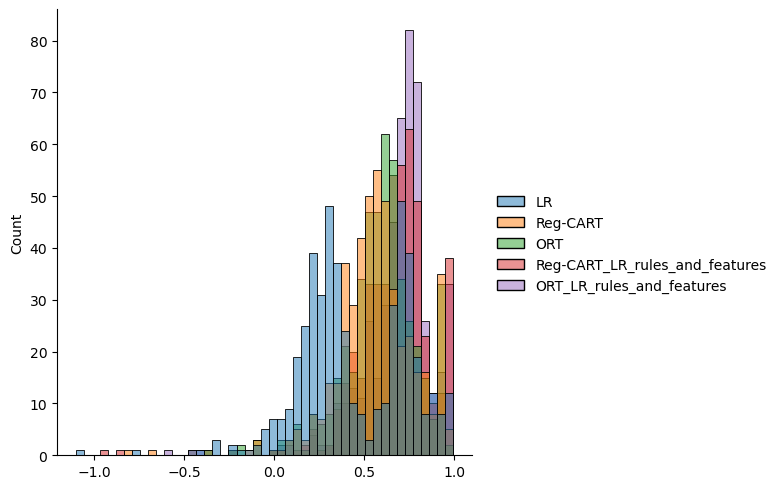

In [378]:


sns.distplot(means)